In [2]:
import sys, os



%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
from hydra import compose, initialize
from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:169: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


# ContinousIV Test

In [34]:
function_keys = [
                "identity",
                "sin",
                "cos",
                "tanh",
                "log1p_abs",
                "exp_neg_sq",
                "sigmoid",
                "exp_clipped"
            ]

data = ContinuousIV.run_rolling_b_X_Y_simulations(
    b_range=(-5, 5), N_points=50, replications=1, n=500,
    # allowed_functions=['identity']
)
data

d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  # Non-strict access to fields


,seed,b_Z_X,b_U_X,b_X_Y,b_U_Y,p_Z,sigma_X,sigma_Y,sigma_U,g_U_X,g_U_Y,squash_X,g_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,Z,U,X,Y,Y_max,Y_min,X_max,X_min,X_mean,Y_mean
0,559243,0.788485,0.544533,-5.000000,0.504682,0.272290,0.806319,0.491221,0.304199,tanh,exp_neg_sq,probit,cos,-6.854203e-01,0.014,1.075423e-01,0.792963,"[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.26433766164233286, 0.5637341069567617, -0.0...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[0.1784637595707722, 0.0, 0.0, 0.0, 0.19624969...",0.999999,0.000000e+00,1,0,0.578,0.394043
1,853644,-0.683015,1.374790,-4.795918,-0.103293,0.955711,0.198727,1.783254,1.646441,sine_sym,sigmoid,softplus,tanh,-3.495287e-01,0.000,2.404176e-03,0.351933,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.6671149941985915, 0.26139582774005704, -0.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[0.99959717111185, 0.0, 0.11194349632480044, 0...",0.999910,0.000000e+00,1,0,0.286,0.249459
2,543325,-1.060167,-0.599711,-4.591837,-1.097416,0.589165,1.072597,1.967138,2.348027,bounded_linear,cos,tanh_scaled,rescaled_identity,-2.456389e-01,0.000,3.286019e-03,0.248925,"[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...","[2.1057788186668924, -3.987058790373129, -0.56...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5886085442202...",0.861069,0.000000e+00,1,0,0.364,0.165254
3,978885,-0.135333,-1.702913,-4.387755,0.297821,0.981180,0.575694,0.614765,0.063148,cos,sin,sigmoid,sigmoid,-4.972320e-01,0.000,1.542115e-02,0.512653,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-0.11095182578211349, 0.0008063540429973532, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0.5623339719761856, 0.5780821595041167, 0.496...",0.912700,2.893646e-03,1,0,0.142,0.440314
4,154045,1.309717,-0.222804,-4.183673,1.773509,0.511286,0.226072,0.637195,0.939104,exp_clipped,cos,probit,bounded_linear,-2.437880e-01,0.000,0.000000e+00,0.243788,"[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...","[0.15278273522331928, 0.2652821311889559, 1.63...","[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, ...","[0.0, 0.18879562214910867, 0.0, 0.0, 0.0, 0.26...",0.654989,0.000000e+00,1,0,0.594,0.092555
5,737361,-0.907467,-0.858457,-3.979592,1.115645,0.359338,0.857370,0.162083,0.314376,cos,rescaled_identity,tanh_scaled,identity,-1.191510e-01,0.000,0.000000e+00,0.119151,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...","[0.054047563099817814, 0.044568192202433105, -...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...","[0.0, 0.0, 0.06347819934222114, 0.0, 0.0, 0.0,...",0.768806,0.000000e+00,1,0,0.190,0.094310
6,74620,-0.891777,2.398860,-3.775510,-0.641787,0.651912,0.009732,0.297902,0.305514,bounded_linear,exp_neg_sq,sigmoid,cos,-7.722152e-01,0.008,1.766204e-02,0.789877,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.29961906213667394, -0.13399773112223268, 0....","[1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, ...","[0.0, 0.9066618140290259, 0.999806692416008, 0...",0.999903,0.000000e+00,1,0,0.372,0.506059
7,507550,-0.167625,-0.434758,-3.571429,1.607061,0.457503,0.031044,0.623786,0.226527,sigmoid,identity,tanh_scaled,identity,-2.676333e-01,0.000,0.000000e+00,0.267633,"[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, ...","[0.01377659726025828, 0.10791702008901677, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, ...","[0.0, 0.0, 0.0, 0.160884665929738, 0.0, 1.0, 0...",1.000000,0.000000e+00,1,0,0.374,0.174795
8,759219,-0.732756,0.713799,-3.367347,-0.151548,0.714607,1.659001,0.224221,0.454662,sigmoid,log1p_abs,probit,sin,1.909883e-01,0.752,2.635130e-01,0.072525,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, ...","[-0.2048462427606778, -0.3606342085047765, 0.0...","[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, ...","[0.27179674501976764, 0.0, 0.16135303160923004...",0.832815,0.000000e+00,1,0,0.546,0.174302
9,86400,-0.985874,0.986596,-3.163265,0.018164,0.245100,1.016092,0.425895,0.865384,sigmoid_shifted,tanh,probit,cos,-9.247251e-01,0.000,0.000000e+0

In [44]:
algs = ['ATE_2SLS-0.99', 'ATE_2SLS-0.98', 'ATE_2SLS-0.95']
contIV = ContinuousIV('IV Dag', data)
contIV.run(algs)
# contIV.binaryIV.data
contIV.data

Running ATE_2SLS-0.99...
2SLS failed for simulation 9 with error: 2SLS produced warnings: ['invalid value encountered in sqrt']
2SLS failed for simulation 36 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for simulation 40 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for simulation 45 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for simulation 49 with error: 2SLS produced warnings: ['invalid value encountered in sqrt']
ATE_2SLS-0.99 completed in 1.00 seconds.
Running ATE_2SLS-0.98...
2SLS failed for simulation 9 with error: 2SLS produced warnings: ['invalid value encountered in sqrt']
2SLS failed for simulation 36 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for

,seed,b_Z_X,b_U_X,b_X_Y,b_U_Y,p_Z,sigma_X,sigma_Y,sigma_U,g_U_X,g_U_Y,squash_X,g_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,Z,U,X,Y,Y_max,Y_min,X_max,X_min,X_mean,Y_mean,ATE_2SLS-0.99_bound_lower,ATE_2SLS-0.99_bound_upper,ATE_2SLS-0.99_bound_valid,ATE_2SLS-0.99_bound_width,ATE_2SLS-0.99_bound_failed,ATE_2SLS-0.98_bound_lower,ATE_2SLS-0.98_bound_upper,ATE_2SLS-0.98_bound_valid,ATE_2SLS-0.98_bound_width,ATE_2SLS-0.98_bound_failed,ATE_2SLS-0.95_bound_lower,ATE_2SLS-0.95_bound_upper,ATE_2SLS-0.95_bound_valid,ATE_2SLS-0.95_bound_width,ATE_2SLS-0.95_bound_failed
0,559243,0.788485,0.544533,-5.000000,0.504682,0.272290,0.806319,0.491221,0.304199,tanh,exp_neg_sq,probit,cos,-6.854203e-01,0.014,1.075423e-01,0.792963,"[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.26433766164233286, 0.5637341069567617, -0.0...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0.999999,0.000000e+00,1,0,0.578,0.394043,-1.000000,-0.606182,True,0.393818,False,-1.000000,-0.645163,True,0.354837,False,-1.000000,-0.702409,False,0.297591,False
1,853644,-0.683015,1.374790,-4.795918,-0.103293,0.955711,0.198727,1.783254,1.646441,sine_sym,sigmoid,softplus,tanh,-3.495287e-01,0.000,2.404176e-03,0.351933,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.6671149941985915, 0.26139582774005704, -0.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",0.999910,0.000000e+00,1,0,0.286,0.249459,-1.000000,0.924863,True,1.924863,False,-1.000000,0.774006,True,1.774006,False,-1.000000,0.552459,True,1.552459,False
2,543325,-1.060167,-0.599711,-4.591837,-1.097416,0.589165,1.072597,1.967138,2.348027,bounded_linear,cos,tanh_scaled,rescaled_identity,-2.456389e-01,0.000,3.286019e-03,0.248925,"[0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...","[2.1057788186668924, -3.987058790373129, -0.56...","[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0.861069,0.000000e+00,1,0,0.364,0.165254,-0.517718,0.091576,True,0.609294,False,-0.488211,0.062070,True,0.550281,False,-0.444879,0.018737,True,0.463615,False
3,978885,-0.135333,-1.702913,-4.387755,0.297821,0.981180,0.575694,0.614765,0.063148,cos,sin,sigmoid,sigmoid,-4.972320e-01,0.000,1.542115e-02,0.512653,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-0.11095182578211349, 0.0008063540429973532, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0.912700,2.893646e-03,1,0,0.142,0.440314,-1.000000,1.000000,True,2.000000,False,-1.000000,1.000000,True,2.000000,False,-1.000000,1.000000,True,2.000000,False
4,154045,1.309717,-0.222804,-4.183673,1.773509,0.511286,0.226072,0.637195,0.939104,exp_clipped,cos,probit,bounded_linear,-2.437880e-01,0.000,0.000000e+00,0.243788,"[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...","[0.15278273522331928, 0.2652821311889559, 1.63...","[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.654989,0.000000e+00,1,0,0.594,0.092555,-0.170158,-0.010303,False,0.159855,False,-0.162417,-0.018044,False,0.144373,False,-0.151048,-0.029413,False,0.121635,False
5,737361,-0.907467,-0.858457,-3.979592,1.115645,0.359338,0.857370,0.162083,0.314376,cos,rescaled_identity,tanh_scaled,identity,-1.191510e-01,0.000,0.000000e+00,0.119151,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...","[0.054047563099817814, 0.044568192202433105, -...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.768806,0.000000e+00,1,0,0.190,0.094310,-0.169440,0.281641,True,0.451081,False,-0.147596,0.259796,True,0.407392,False,-0.115515,0.227716,False,0.343231,False
6,74620,-0.891777,2.398860,-3.775510,-0.641787,0.651912,0.009732,0.297902,0.305514,bounded_linear,exp_neg_sq,sigmoid,cos,-7.722152e-01,0.008,1.766204e-02,0.789877,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.29961906213667394, -0.13399773112223268, 0....",

[autoreload of simulation_engine.scenarios.iv.binary_iv failed: Traceback (most recent call last):
  File "C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "d:\Programme\anaconda\envs\py312\Lib\importlib\__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "d:\TUM Workspace\Thesis Workspace\causal-bounds\simu

             Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width
         ATE_2SLS-0.95         10.00            15.56          0.9266      1.1842
         ATE_2SLS-0.98         10.00             6.67          1.0034      1.1629
         ATE_2SLS-0.99         10.00             6.67          1.0788      1.2262
   ATE_zhangbareinboim           N/A              N/A             N/A         NaN
ATE_causaloptim-binned           N/A              N/A             N/A         NaN
  ATE_autobound-binned           N/A              N/A             N/A         NaN


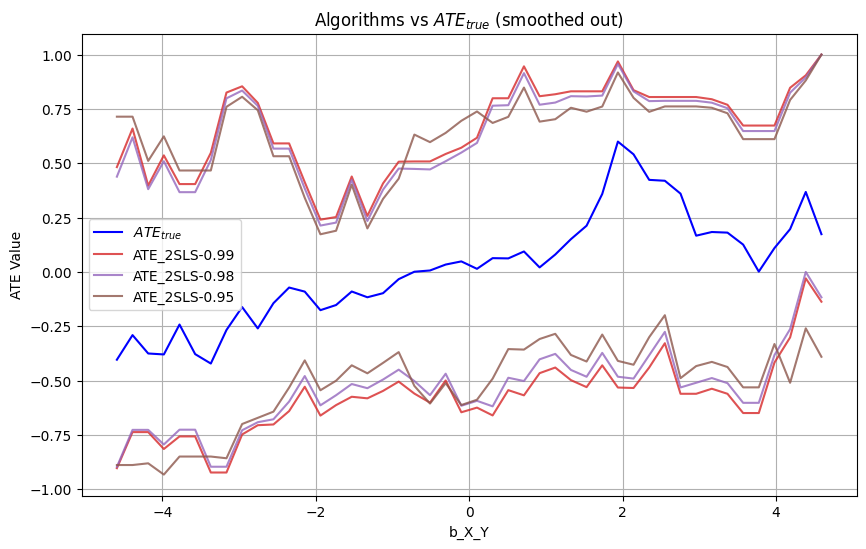

In [46]:
algs = contIV.get_algorithms('ATE')
PlottingUtil.print_bound_statistics_table(contIV.data, algs)
PlottingUtil.plot_smoothed_query_vs_bounds(contIV.data, 'ATE', algs, 5)

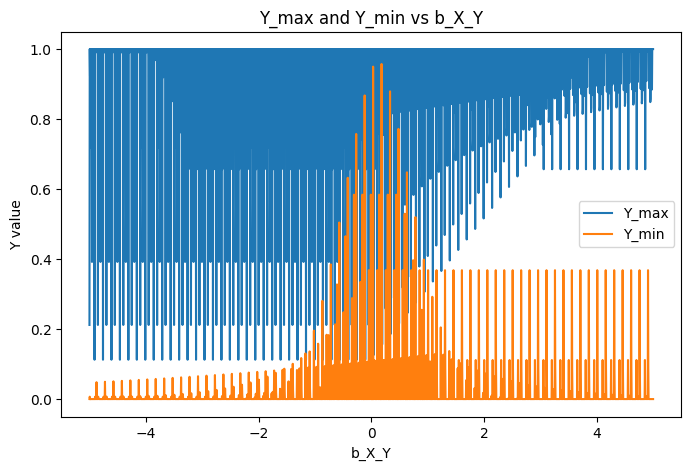

In [107]:
import matplotlib.pyplot as plt

y_label = 'Y'
plt.figure(figsize=(8, 5))
plt.plot(data['b_X_Y'], data[f'{y_label}_max'], label=f'{y_label}_max')
plt.plot(data['b_X_Y'], data[f'{y_label}_min'], label=f'{y_label}_min')
# plt.plot(data['b_X_Y'], data[f'{y_label}_mean'], 'o-', label=f'{y_label}_mean')
plt.xlabel('b_X_Y')
plt.ylabel(f'{y_label} value')
plt.title(f'{y_label}_max and {y_label}_min vs b_X_Y')
plt.legend()
plt.show()

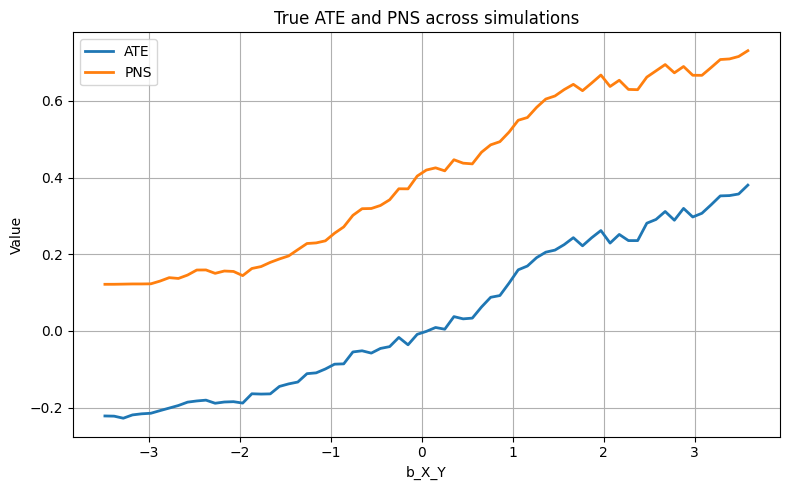

In [46]:
PlottingUtil.plot_ate_pns(data, window=30)

In [50]:
binaryIV = BinaryIV('IV Dag', data)
algs = ['ATE_2SLS-0.99', 'ATE_2SLS-0.98', 'ATE_2SLS-0.95']

algorithms = [alg for alg in binaryIV.get_algorithms('ATE') if 'zaffalonbounds' not in alg]
algorithms
runtimes = binaryIV.run(algs)

Running ATE_2SLS-0.99...
2SLS failed for simulation 9 with error: 2SLS produced warnings: ['invalid value encountered in sqrt']
2SLS failed for simulation 36 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for simulation 40 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for simulation 45 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for simulation 49 with error: 2SLS produced warnings: ['invalid value encountered in sqrt']
ATE_2SLS-0.99 completed in 1.06 seconds.
Running ATE_2SLS-0.98...
2SLS failed for simulation 9 with error: 2SLS produced warnings: ['invalid value encountered in sqrt']
2SLS failed for simulation 36 with error: 2SLS produced warnings: ['divide by zero encountered in divide', 'invalid value encountered in matmul']
2SLS failed for

In [ ]:
algorithms = list(runtimes['runtimes'].keys())
ate_algs = binaryIV.get_algorithms('ate')
# PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.print_bound_statistics_table(binaryIV.data, algs)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'ate', algs, 5, False)

             Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width
         ATE_2SLS-0.95         10.00            15.56          0.9266      1.1842
         ATE_2SLS-0.98         10.00             6.67          1.0034      1.1629
         ATE_2SLS-0.99         10.00             6.67          1.0788      1.2262
       ATE_causaloptim           N/A              N/A             N/A         NaN
       PNS_causaloptim           N/A              N/A             N/A         NaN
         ATE_autobound           N/A              N/A             N/A         NaN
         PNS_autobound           N/A              N/A             N/A         NaN
ATE_entropybounds-0.80           N/A              N/A             N/A         NaN
ATE_entropybounds-0.20           N/A              N/A             N/A         NaN
ATE_entropybounds-0.10           N/A              N/A             N/A         NaN
PNS_entropybounds-0.80           N/A              N/A             N/A         NaN
PNS_entropybound

KeyError: 'ate_true'